# Playing with the analysis of Maxwell

19 May 2021, Maxwell & Ben

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#import tensorflow as tf 
from sklearn.decomposition import PCA

## Loading the binned data

In [4]:
output_directory = "data/binned/TTau/IRS-Christian/"
spectra = pd.read_csv(os.path.join(output_directory, "TTau_spectra_binned_fluxes.csv"))
spectra.head()

,CX-Tau,SZ50,DF-Tau,DG-Tau,BP-Tau,DR-Tau,GW-Lup,FT-Tau,V1094Sco,DN-Tau,...,WX-Cha,LkCa15,SY-Cha,WA-Oph6,HK-Tau-B,RW-Aur,XX-Cha,SZ98,VW-Cha,wavelength
0,0.094564,0.135032,1.286557,1.864737,0.316833,2.050333,NaN,0.162737,0.135167,0.239397,...,0.511260,0.155042,0.173041,0.915681,0.194190,1.008920,0.138236,0.353582,0.926323,5.125
1,0.099114,0.146360,1.144572,1.989051,0.330404,1.914572,NaN,0.171933,0.130256,0.228572,...,0.442444,0.153514,0.165710,0.889866,0.190915,0.992892,0.131882,0.337941,0.878628,5.375
2,0.098763,0.144867,1.054155,2.011706,0.319811,1.881706,NaN,0.163080,0.122607,0.226957,...,0.424629,0.143247,0.159675,0.873766,0.180816,0.949140,0.127940,0.338554,0.834307,5.625
3,0.098917,0.147476,1.075395,2.110258,0.317471,1.892422,NaN,0.156957,0.123200,0.222620,...,0.422534,0.140699,0.161724,0.861376,0.172734,0.928021,0.126169,0.344466,0.809528,5.875
4,0.100230,0.150169,1.037847,2.122913,0.321052,1.842032,NaN,0.154219,0.118323,0.223233,...,0.406240,0.132310,0.158932,0.848555,0.170350,0.912182,0.123827,0.349215,0.776016,6.125


In [38]:
file = "nr_200_cr_abun_3-8_temp_100-300.npy"
syn_specs = np.load(os.path.join("synthetic_spectra", "specs_"+file))
syn_grid = np.load(os.path.join("synthetic_spectra", "grid_"+file))
print("Nr of specs, spec resolution: ", syn_specs.shape)
print("Nr of specs, nr of params: ", syn_grid.shape)

Nr of specs, spec resolution:  (200, 149)
Nr of specs, nr of params:  (200, 4)


## Principel Component Analysis

In [18]:
specs = spectra.dropna(axis=1).to_numpy()[:, :-1].T # remove the last column, which is the wavelength
spec.T[5]
print("Nr of specs, spec resolution: ", specs.shape)

Nr of specs, spec resolution:  (23, 120)


Fit the PCA model

In [19]:
pca = PCA(n_components=2).fit_transform(specs) # pca[samples, components]
pca_syn = PCA(n_components=2).fit_transform(syn_specs) # pca[samples, components]

We will scale the marker size based on the mean slope of the spectrum

In [26]:
mean_flux = np.mean(specs, axis=1) 
mean_slope = abs(np.mean(np.diff(specs, axis=1), axis=1))
marker_size = 1000 * mean_slope/max(mean_slope)

mean_flux_syn = np.mean(syn_specs, axis=1) 
mean_slope_syn = abs(np.mean(np.diff(syn_specs, axis=1), axis=1))
marker_size_syn = 100 * mean_slope/max(mean_slope)

We make a plot of the two components

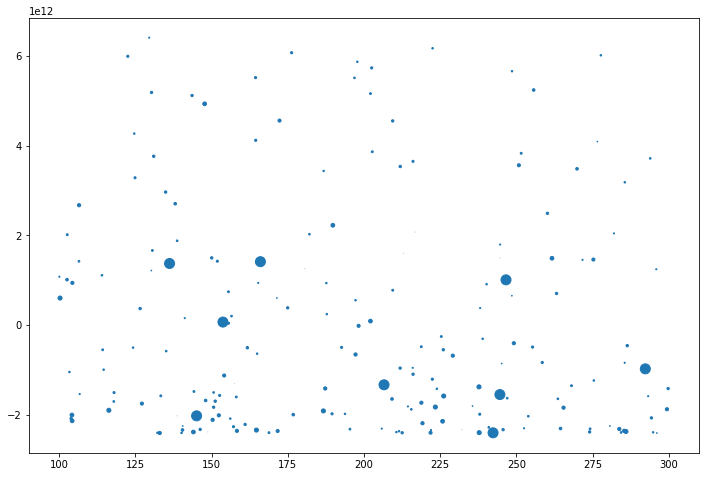

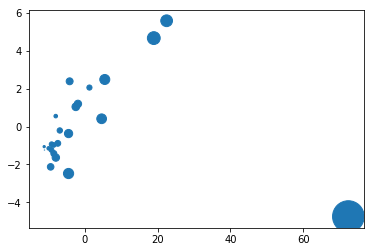

0.48457180851600967 0.2833788388779253


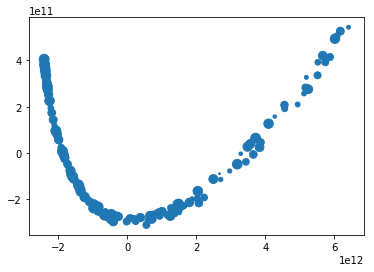

In [75]:
plt.figure(1, figsize=(12,8))
# Use the mean slopes to color-code each spectrum



plt.scatter(syn_grid[:, 3], pca_syn[:,0]  ,s=marker_size_syn)
plt.show()
plt.close()

plt.scatter(pca[:,0], pca[:,1],s=marker_size)
plt.show()
plt.close(1)

temps = syn_grid[:,3]-min(syn_grid[:,3])
temps = temps/max(temps)
print(np.mean(temps), np.std(temps))
plt.scatter(pca_syn[:,0], pca_syn[:,1],s=100*temps)
plt.show()
plt.close()


# plt.show()
# plt.close(1)

# plt.scatter(mean_flux, mean_slope,s=marker_size)
# plt.show()
# plt.close()

# plt.scatter(pca[:,0],mean_flux)
# plt.show()
# plt.close()

# plt.scatter(pca[:,1],mean_flux)
# plt.show()
# plt.close()

# plt.scatter(pca[:,0],mean_slope)
# plt.show()
# plt.close()

# plt.scatter(pca[:,1],mean_slope)
# plt.show()
# plt.close()